# 1. Importing Packages

In [71]:
import pandas as pd
import numpy as np

#testing

# 2. Importing Data

In [99]:
customer_df= pd.read_csv(
    "../input_data/olist_customers_dataset.csv"
)

geolocation_df= pd.read_csv(
    "../input_data/olist_geolocation_dataset.csv"
)

items_df= pd.read_csv(
    "../input_data/olist_order_items_dataset.csv"
)

payments_df= pd.read_csv(
    "../input_data/olist_order_payments_dataset.csv"
)

orders_df= pd.read_csv(
    "../input_data/olist_orders_dataset.csv"
)

products_df= pd.read_csv(
    "../input_data/olist_products_dataset.csv"
)

name_translation_df= pd.read_csv(
    "../input_data/product_category_name_translation.csv"
)

# 3. Cleaning Data

In [80]:
# Summarising lat long data by Zip Code

geolocation_df = (
    geolocation_df.
        groupby('geolocation_zip_code_prefix').
        aggregate({'geolocation_lat':'mean','geolocation_lng':'mean'}).
        reset_index()
)
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [100]:
# Aggregating item data by order

items_df = (
    items_df.
    groupby(
        ['order_id','product_id', 'seller_id', 'shipping_limit_date']
    ).agg(
        {'price':'sum', 'freight_value':'sum', 'order_item_id':'max'}
    ).reset_index().rename(columns={'order_item_id':'order_item_count'}).sort_values('order_item_count', ascending=False)
)

In [ ]:
payments_df = payments_df[]

In [101]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [97]:
# Joining Datasets

final_df = (
    orders_df.
    merge(items_df, on='order_id', how='left').
    merge(products_df, on='product_id', how='left').
    merge(sellers_df, on='seller_id', how='left').
    

)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_item_count
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57,21
10850,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,2000.0,202.40,20
68186,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,1974.0,288.80,20
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,12.0,78.90,20
63242,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,765.0,18.00,15


In [84]:
items_df[items_df.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12


In [83]:
items_df.groupby(['order_id', 'product_id']).count().sort_values('order_item_id', ascending=False).head()

,,order_item_id,seller_id,shipping_limit_date,price,freight_value
order_id,product_id,,,,,
1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,20,20,20,20,20
ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,20,20,20,20,20
428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,15,15,15,15,15
9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,15,15,15,15,15
73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,14,14,14,14,14


In [79]:
test = orders_df[['order_id', 'customer_id']].drop_duplicates().merge(customer_df[['customer_id', 'customer_unique_id']].drop_duplicates(), on='customer_id', how='left')

test = test.groupby('customer_unique_id').count().sort_values(by='order_id', ascending=True).reset_index()

In [60]:
test.head()

,customer_unique_id,order_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,a926cfc9bc7b082335de50450f48eec9,1,1
2,a926aae38267e7f54e67de9b5775d0a5,1,1
3,a92605ec492805540520d3a73aaeeb6e,1,1
4,a925c3e5df82fdc6082f1383d2834998,1,1


In [67]:
test = test[test.order_id > 1]

In [70]:
test.shape

(2997, 3)

/Users/diegosouza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='order_id', ylabel='Density'>

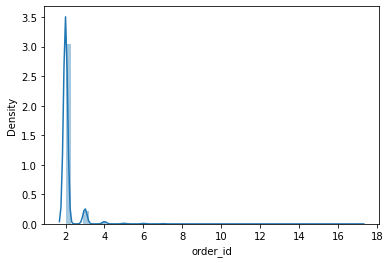

In [69]:
import seaborn as sns

sns.distplot(test.order_id)